# 线性模型

## 正规方程
* 使用数学方法推导能直接求得参数的方法为Normal Equation。而对于线性模型，数学方法为：最小二乘法。通过最小二乘法能直接得到线性模型：
$$ \theta = {(X^{T}X)}^{-1}{X^{T}}y$$

In [1]:
# 我们来测试一下y=4*x+3
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.90900254]), array([[3.05721225]]))

* 可以看到得到的结果接近4和3，没有达到准确值是由于加入了随机噪声的原因。
* 虽然能够精确的得到结果，但是这个算法的复杂度很高，适合数据量小、特征数少的情况。

## 梯度下降法
* 为了处理较大的数据，通常采用梯度下降法，得到一个近似解（非精确解），但是速度较快。梯度下降法通过设置学习率$\alpha$与迭代次数iter来更新权值wieght。
$$ \theta:= \theta + \alpha(X{\theta}^T-y)X $$

### 批量梯度下降（batch gradient descent）
* 每次迭代使用所有样本计算梯度，取平均，来更新参数，能直接朝着局部最优解方向前进。

In [2]:
alpha = 0.1 #设置学习率
n_iterations = 1000 #设置迭代次数
m = 100 #设置样本数量

# 初始化theta
theta = np.random.randn(2,1) # random initialization
X_b = np.c_[np.ones((100, 1)), X]

for iteration in range(n_iterations):
    gradients = 2/float(m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients
    
theta

array([[3.90900254],
       [3.05721225]])

* 我们可以得到和正规方程类似的结果。

### 随机梯度下降（Stochastic Gradient Descent）
* Batch Gradient Descent每次迭代使用全部训练集，当数据量较大时，训练速度会很慢。
* 与这个相反，随机梯度下降（Stochastic Gradient Descent）就是每一代随机选择一个样本，计算梯度，更新参数。由于每次只抽取一个样本，因此在大量数据也能很好的计算。
* 但是当接近最优解时，随机梯度始终无法收敛到最优解，只能在最优解附近徘徊。

In [4]:
# 我们使用随机梯度下降分类器

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.87050858]), array([3.01292483]))

### 小批量梯度下降（Mini-batch Gradient Descent）
* 结合Batch Gradient Descent和Stochastic Gradient Descent，每一代计算Mini-batch（远小于Batch）个样本的梯度，计算平均值，更新参数。这种方式的好处是能在数据量比较大的训练样本中进行矩阵运算。

# 多项式模型

* 如果数据不是简单的一条直线，也可以通过线性模型来训练，其中一种比较简单的方法是通过给训练数据特征开n次方。
* 利用sklearn中的PolynomialFeatures得到新的特征，再训练线性模型。

In [9]:
# 设置一下X和y
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# 创建多项式特征
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0],X_poly[0]

# 构建线性模型
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_,lin_reg.coef_

(array([1.87979951]), array([[1.05738121, 0.55379236]]))

* 使用高degree创造非常多特征来作多项式模型，你能够很好的拟合训练数据。然而这种只对训练数据拟合的情况称为过拟合。

## 模型评价方法：学习曲线
* 我们已经说过了一种模型评价方法：交叉验证法。
* 下面再介绍一种方法：学习曲线（LearningCurves）。通过分开训练和验证集，不断调整训练集的数量，计算根均方误差来画出曲线，观察训练集和验证集在训练中的情况。

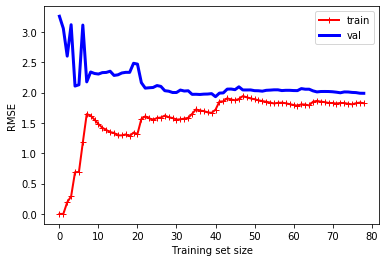

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

* 可以看到当训练集中只有一个或两个实例时，模型可以完美地拟合它们，这就是曲线从零开始的原因。但是，当新样本被添加到训练集时，模型不可能很好地拟合训练数据，这是由于样本是复杂的。
* 再看看验证数据上模型的性能。当模型在很少的训练样本时，就不能很好的泛化推广，这就是为什么验证错误最初是相当大的。当新样本被添加到训练集时，通过学习，从而验证错误缓慢下降。误差最终会停留在一个类似高原的地方。
* 间隙越大，说明过拟合程度越大。

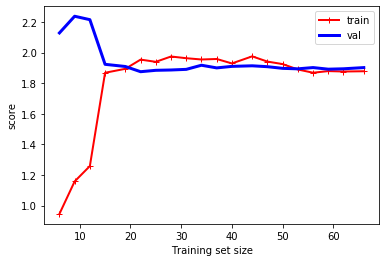

In [40]:
# 也可以用sklearn的learning_curve进行绘画
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X, y, scoring="neg_mean_squared_error",
                                                         train_sizes=np.linspace(0.1, 1, 20), cv=3)
train_scores = np.sqrt(-train_scores)
valid_scores = np.sqrt(-valid_scores)

plt.plot(train_sizes, np.mean(train_scores,axis=1), "r-+", linewidth=2, label="train")
plt.plot(train_sizes, np.mean(valid_scores,axis=1), "b-", linewidth=3, label="val")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.show()

# 正则化线性模型
* 为了防止过拟合，可以给模型损失函数增加正则项。
* 正则化（regularized）有三种方式：l2、l1以及elastic net。
* 在进行正则化之前，需要进行特征缩放。

## Ridge Regression（L2正则化）
$$ J(\theta) = costfunction(\theta) + \alpha \frac{1}{2}\sum_{i=1}^{n}{\theta}^2$$

In [60]:
# 对于正规方程即最小二乘法
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")#设定正则化系数为1
ridge_reg.fit(X, y)
ridge_reg.intercept_,ridge_reg.coef_

(array([3.56794251]), array([[1.11219311]]))

In [61]:
# 对于随机梯度下降L2正则化
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2",alpha=0.01)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.54099548]), array([1.11000845]))

## Lasso Regression（L1正则化）
$$ J(\theta) = costfunction(\theta) + \alpha\sum_{i=1}^{n}|\theta|$$
* 与L2正则化不同的是，正则项从二次方变为了一次放的绝对值，这就带来的一个特性，不同于L2正则化使得$\theta$在原点附近（即大部分都靠近0），L1正则化使得更趋向于在坐标轴上（即大部分的等于零，少部分靠近零），相当于惩罚变得更大。
* L1正则化后会导致在最优点附近震荡，因此要像随机梯度下降一样减小学习率。

In [56]:
# 对于正规方程（最小二乘法）
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) # 正则化系数设置为0.1
lasso_reg.fit(X, y)
lasso_reg.intercept_, lasso_reg.coef_

(array([3.57370317]), array([1.08285282]))

In [58]:
# 对于随机梯度下降正则化L2
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l1",alpha=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.53200303]), array([1.09067169]))

## Elastic Net
$$ J(\theta) = costfunction(\theta) + r \alpha \sum_{i=1}^{n}|\theta| + \frac{1-r}{2}\alpha \sum_{i=1}^{n}{\theta}^2$$
* 可以看到Elastic Net是L1正则化和L2正则化的结合，通过一个参数调整比例。

In [62]:
# 最小二乘ElasticNet方法
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.intercept_, elastic_net.coef_

(array([3.57396732]), array([1.08150746]))

In [63]:
# 随机梯度下降ElasticNet（线性）
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="elasticnet",l1_ratio=0.5,alpha=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.5362544]), array([1.0878397]))

## 如何选择正则化
* 加入少量的正则化一般都会给模型带来一定的提升。一般情况下都会选择Ridge（L2）。
* 但是如果得知数据中只有少量的特征是有用的，那么推荐使用Lasso（L1）或Elastic Net。
* 一般来说Elastic Net会比Lasso效果要好，因为当遇到强相关性特征说特征数量大于训练样本时Lasso会表现的很奇怪。

##  提前终端训练
* 通过调整迭代次数，在验证误差达到最小时立即停止训练。
* 随着迭代次数的上升，验证集上的预测误差会下降。但是，过了一段时间验证错误停止下降，反而往上开始回升。这表明该模型已经开始过度拟合训练数据。一旦验证错误达到最小，立即停止训练。这是一种简单而有效的正则化技术。

# 逻辑回归模型
* Logistic回归与线性回归模型相似，Logistic回归在线性回归的基础上增加了sigmoid函数。
$$h_\theta(x) = \frac{1}{1+e^{-{\theta^{T}X}}}$$
* 损失函数采用对数似然损失函数：
$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y_ilog(h_{\theta}(x_i))+(1-y_i)log(1-h_{\theta}(x_i)]$$
* 训练和线性回归相似，可以用梯度下降更新参数。

In [82]:
# 载入鸢尾花数据
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, 3:] # 只读取最后一个特征
y = (iris["target"] == 2).astype(np.int) # 取出判断是否为第2类的label

In [85]:
#训练Logistic回归模型
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = "lbfgs")
log_reg.fit(X, y)
log_reg.score(X,y)

0.96

# softmax回归模型
* Logistic回归是一个二分类器，然而不需要像第4节所讲到了训练多个二分类器来实现多分类，可以直接扩展成一个多分类器Softmax回归。
* 对于Softmax回归使用交叉熵（cross entropy）函数作为损失函数：
$$J(\theta) = - \frac{1}{m}{\sum_{i=1}^m}{\sum_{k=1}^K}y_k^{(i)}log(p_k^{(i)})$$
* sklearn的LogisticRegression默认使用OVA,如果使用Softmax就设置multi_class='multinomial'。

In [86]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)
softmax_reg.score(X,y)

0.96

# 支持向量机模型
* 支持向量机（SVM）是一种非常强大的机器学习模型，能够进行线性、非线性分类、回归问题，还能检测异常值。
* SVM特别适用于复杂但小型或中型的数据集的分类，包括线性SVM（linear SVM）和内核SVM（kernel SVM）两种。
* SVM的损失函数是hinge loss。

> 常见的损失误差有五种：
> * 1. 铰链损失（Hinge Loss）：主要用于支持向量机（SVM） 中；
> * 2. 交叉熵损失 （Cross Entropy Loss，Softmax Loss ）：用于Logistic 回归与Softmax 分类中；
> * 3. 平方损失（Square Loss）：主要是最小二乘法（OLS）中,对应的代价函数是MSE（Mean Square error）和RMSE；
> * 4. 指数损失（Exponential Loss） ：主要用于Adaboost 集成学习算法中；
> * 5. 其他损失（如0-1损失，绝对值损失）：0-1主要用于感知机

* Soft margin classification：在SVM，常数C叫做松弛因子，可以看做是正则化参数$\lambda$的倒数，C越大，正则化越不明显，分类越严格；C越小，正则化越明显，分类越不严格。
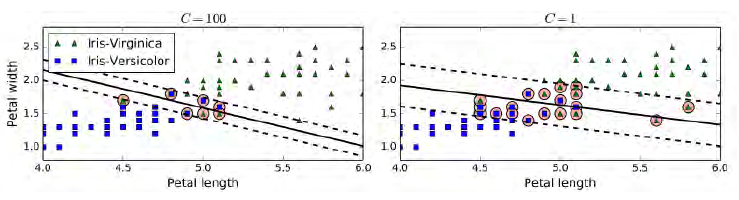
* 如果图形过拟合了，则调小C

## linear SVM

sklearn中有三种方法可以使用linear SVM。
* LinearSVC：速度最快，但不能处理大量数据
* SVC(kernel = "linear",C = 1)：速度比LinearSVC慢很多
* SGDClassifier(loss="hinge",alpha=1/(m\*C))：能够处理大量数据，并且能够在线学习。

In [87]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC #使用LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] #调用两个特征
y = (iris["target"] == 2).astype(np.float64) # 二分类

svm_clf = Pipeline((("scaler", StandardScaler()),
                    ("linear_svc", LinearSVC(C=1, loss="hinge"))))
svm_clf.fit(X, y)

#预测
svm_clf.predict([[5.5, 1.7]])

array([1.])

## nonlinear SVM

### 多项式核（polynomial kernel）
* 基于这个思想，可以增加多项式特征来进行非线性分类。但是如果degree设置的比较大，产生了大量模型，会导致训练非常慢。

* SVM能运用一些数学技巧，称为核技巧（Kernel trick），可以不真正的增加这些特征，来达到增加这些多项式特征相同的效果。所以这种方法可以在SVC类中使用。

* sklearn中运用到的函数是SVC(kernel = 'poly', degree=3, coef0=1, C=5):
    * 其中coef0表示高degree的特征相比低degree特征对模型的影响程度。
    * 参数C为松弛因子，可以调剂soft margin。

In [97]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC #

# 构造球型数据集
(X,y)=make_moons(200,noise=0.2)

# 使用SVC类中的多项式核训练
poly_kernel_svm_clf = Pipeline((("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))))
poly_kernel_svm_clf.fit(X, y)

# 预测
poly_kernel_svm_clf.predict([[5.5, 1.7]])

array([1], dtype=int64)

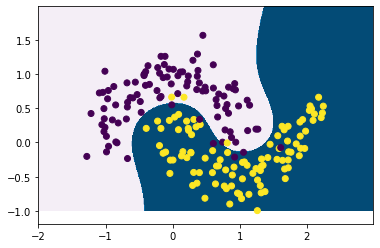

In [98]:
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.arange(-2,3,0.01), np.arange(-1,2,0.01))
y_new=poly_kernel_svm_clf.predict(np.c_[xx.ravel(),yy.ravel()])

plt.contourf(xx, yy, y_new.reshape(xx.shape),cmap="PuBu")
plt.scatter(X[:,0],X[:,1],marker="o",c=y)

### 高斯径向基核（gaussian RBF kernel）
* 除了通过多项式增加特征以外，还有别的增加特征的方式，比如通过Gaussian Radial Basis Function (RBF)增加相似特征。高斯RBF的表达式为：
$$\phi\gamma(x,l) = exp(-{\gamma}{||x-l||}^2) = e^{-{\gamma}{||x-l||}^2}$$
* 其中参数$l$（landmark）表示标记，选择landmark最简单的方法是在数据集中的每个实例位置创建一个landmark，其优点和缺点分别是：
    * 优点：创建了许多特征，从而使得变换后的训练集将是线性可分的。
    * 缺点：具有m个实例和n个特征的训练集被转换成具有m个实例和m个特征的训练集（假设放弃了原始特征）。如果训练集非常大，则会得到大量的特征，影响计算速度。
* $\gamma$就像一个正则化参数（和C作用一样），会影响决策线，$\gamma$越大，决策线约窄，模型可能会过拟合。

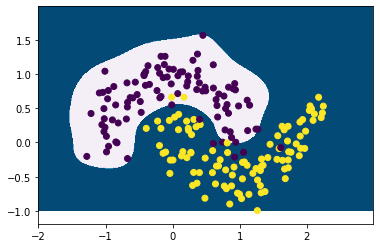

In [103]:
#训练RBF核SVM
rbf_kernel_svm_clf = Pipeline((("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))))
rbf_kernel_svm_clf.fit(X, y)

#画出决策线
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.arange(-2,3,0.01), np.arange(-1,2,0.01))
y_new=rbf_kernel_svm_clf.predict(np.c_[xx.ravel(),yy.ravel()])

plt.contourf(xx, yy, y_new.reshape(xx.shape),cmap="PuBu")
plt.scatter(X[:,0],X[:,1],marker="o",c=y)

* 除了多项式核和高斯RBF核以外还有一些别的核，但都不太常用。
* 有这么多的内核可供选择，应该使用哪一个？一个经验法则，应该总是先尝试线性内核（LinearSVC比SVC（kernel =“linear”）快得多），特别是当训练集非常大或者有很多特征的时候。如果训练集不是太大，应该尝试高斯RBF核; 它在大多数情况下运行良好。如果你有空闲时间和计算能力，你还可以使用交叉验证和网格搜索来试验其他一些内核。

## SVM regression
* SVM除了能进行分类任务以外还能做回归任务。
* 与SVM分类任务通过调整参数C尽量让点在margin以外,而SVM回归则是通过参数$\epsilon$尽量让点在margin以内。
* SVM回归通过参数$\epsilon$控制margin的大小，$\epsilon$越大，margin越大，否则越小。
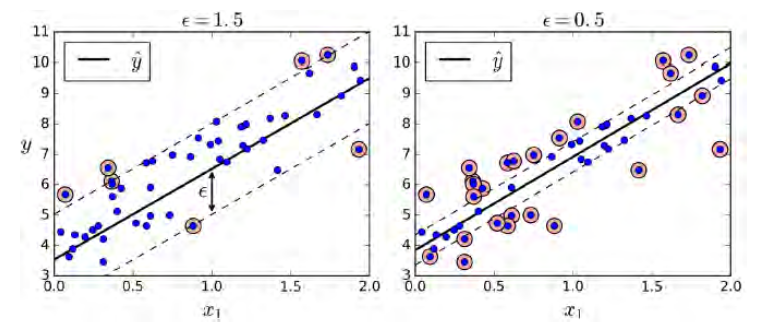

In [105]:
# 举一个线性SVM的例子
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

# 决策树模型
* 决策树算法即可用于分类，也可用于回归。Sklearn使用的为CART algorithm，即每次只生成两个分支，而ID3等算法可以产生多个分支。
* 决策树有其优点和缺点：
    * 优点1：易于使用，易于展示与理解。
    * 优点2：只需要很少样本就可以生成，而且不需要对特征进行缩放。

    * 缺点1：由于决策树算法对训练数据没有什么假设（相比线性模型假设决策线为一条线），这就对算法没有任何限制，因此很容易导致过拟合。
    * 缺点2：算法不稳定。喜欢正交决策边界（垂直），对数据集旋转敏感；此外如果训练样本校有变动，可能导致决策线发生巨大改变。

## 决策树分类

In [106]:
# 来看鸢尾花分类的例子
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier #导入决策树函数

iris = load_iris()
X = iris.data[:, 2:] 
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

# 训练完来看一下预测为每一类的概率
print(tree_clf.predict_proba([[5, 1.5]]))
# 看一下最终结果
tree_clf.predict([[5, 1.5]])

[[0.         0.90740741 0.09259259]]


array([1])

* 我们还可以用export_graphviz()方法把决策树画出来。

In [112]:
from sklearn.tree import export_graphviz

export_graphviz(
tree_clf,
out_file="iris_tree.dot",
feature_names=iris.feature_names[2:],
class_names=iris.target_names,
rounded=True,
filled=True
)
# 在cmd中安装graphviz包
# 输入：“dot -Tpng iris_tree.dot -o iris_tree.png ”可以将dot文件转换成png格式。

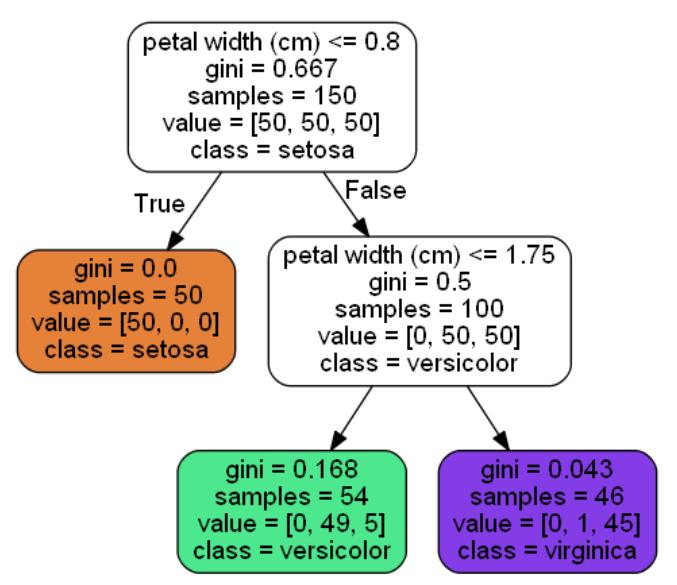
* 图中白色框的第一行为划分条件，gini为划分比例，samples为此时总共有多少样本，value为此时每一类样本的总数，class为分为哪一类。

## 决策树正则化参数

防止决策树过拟合的参数（DecisionTreeClassifier）：
* 决策树最大深度（max_depth）
* 节点被分开的最小样本数（min_samples_split）
* 叶子节点的最小样本数（min_samples_leaf）
* 分开节点变为叶子的最小比例（min_weight_fraction_leaf）
* 叶子节点的最大数（max_leaf_nodes）
* 分开时评估的最大特征数（max_features）\
增加min_,减少max_都能正则化算法。
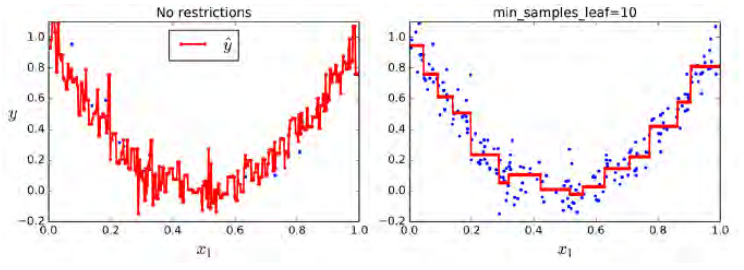

## 决策树回归
* 决策树回归与决策树分类相似，不同的是分类叶子节点最终预测的是类别，而回归叶子节点最终预测的是一个值。

In [114]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

## 特征重要性
* 由于决策树算法根据最优特征分层划分的，即根部特征更为重要，而底部特征不重要（不出现特征更不重要）。根据这个可以判断特征的重要程度。
* Sklearn可以通过feature_importance获得特征的重要程度。

In [124]:
tree_reg.feature_importances_

array([0.79377929, 0.20622071])